In [14]:
# SVM Algorithm

import numpy as np

class SVM:
    
    def __init__(self, learning_rate=0.01, n_iters=100, lambda_param=0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_param = lambda_param
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        y_ = np.where(y<=0, -1, 1)
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >=1
                if condition:
                    self.weights -= self.lr * 2*self.lambda_param*self.weights
                else:
                    self.weights -= self.lr * 2*self.lambda_param*self.weights - y_[idx]*x_i
                    self.bias -= self.lr * (-y_[idx])
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

1.0


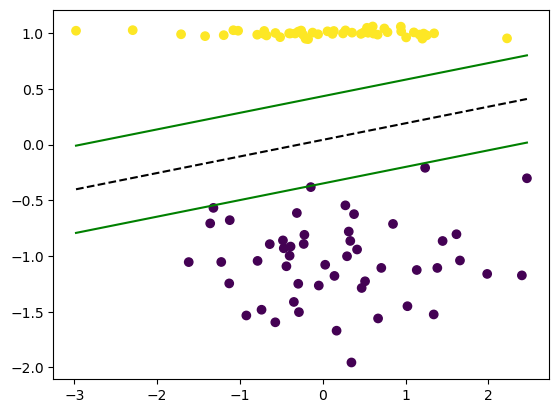

In [30]:
# test

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, n_classes=2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVM()
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)

def accuracy(y_true, y_test):
    return np.sum(y_true == y_test) / len(y_true)

y_test = np.where(y_test==0, -1, 1)
acc = accuracy(y_test, y_predict)
print(acc)

def visualize_svm():
    
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0]*x - b + offset) / w[1]
    
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.scatter(X[:,0],X[:,1], c=y)
    
    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])
    
    x1_1 = get_hyperplane_value(x0_1, svm.weights, svm.bias, 0)
    x1_2 = get_hyperplane_value(x0_2, svm.weights, svm.bias, 0)
    
    x1_1_p = get_hyperplane_value(x0_1, svm.weights, svm.bias, 1)
    x1_2_p = get_hyperplane_value(x0_2, svm.weights, svm.bias, 1)
    
    x1_1_m = get_hyperplane_value(x0_1, svm.weights, svm.bias, -1)
    x1_2_m = get_hyperplane_value(x0_2, svm.weights, svm.bias, -1)
    
    ax1.plot([x0_1, x0_2],[x1_1, x1_2], "k--")
    ax1.plot([x0_1, x0_2],[x1_1_p, x1_2_p], "g-")
    ax1.plot([x0_1, x0_2],[x1_1_m, x1_2_m], "g-")
    
    plt.show()

visualize_svm()